# Exercise: Variable scaling

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import seaborn as sns


## Loading a dataset
[Dataset: House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

![column description](https://storage.googleapis.com/kaggle-forum-message-attachments/479761/11440/Screenshot%202019-02-27%20at%205.26.24%20PM.png)

In [91]:
house_data = pd.read_csv('data/kc_house_data.csv',parse_dates=[1])

house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [92]:
# zero seems to be a placeholder for missing data in some columns
house_data.apply(lambda _: _.isin([0]).sum(), axis=0)

id                   0
date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [93]:
# in the columns, where it makes sense, replacing 0 with NaN
for columns in ['bedrooms', 'bathrooms']:
    house_data.loc[:,columns] = (
        house_data.loc[:,columns]
        .replace(0, np.NaN))

In [94]:
# replace yr_renovated=0 with yr_built value
not_renovated = house_data.yr_renovated == 0
house_data.loc[not_renovated,'yr_renovated'] =(
    house_data.loc[not_renovated, 'yr_built']
)
house_data = house_data.drop(columns=['yr_built'], errors='ignore')

In [95]:
# drop rows with NA
house_data = house_data.dropna(axis=0, how='any')

In [96]:
house_data.loc[:,'basement_ratio'] = house_data.sqft_basement/house_data.sqft_living
house_data = house_data.drop(columns=['sqft_above', 'sqft_basement'], errors='ignore')

In [97]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21597 non-null  int64         
 1   date            21597 non-null  datetime64[ns]
 2   price           21597 non-null  float64       
 3   bedrooms        21597 non-null  float64       
 4   bathrooms       21597 non-null  float64       
 5   sqft_living     21597 non-null  int64         
 6   sqft_lot        21597 non-null  int64         
 7   floors          21597 non-null  float64       
 8   waterfront      21597 non-null  int64         
 9   view            21597 non-null  int64         
 10  condition       21597 non-null  int64         
 11  grade           21597 non-null  int64         
 12  yr_renovated    21597 non-null  int64         
 13  zipcode         21597 non-null  int64         
 14  lat             21597 non-null  float64       
 15  lo

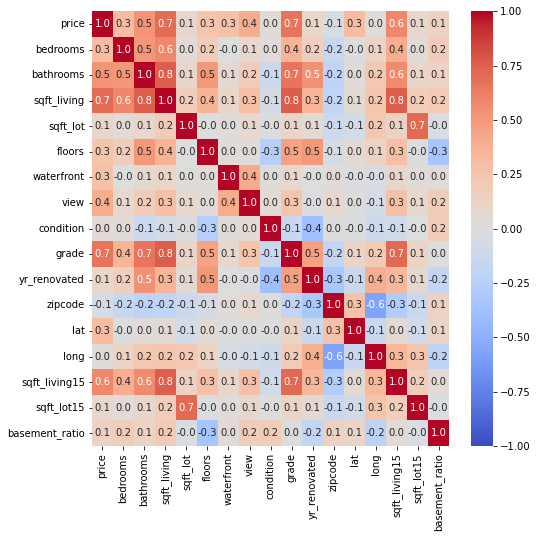

In [98]:
sns.heatmap(house_data.drop(columns=['id']).corr(),
            vmin=-1, vmax=1,
            annot=True, fmt=".1f", cmap='coolwarm')
plt.gcf().set_size_inches(8,8)

## Task
You want to use this data to predict house prices. You decide to start with a simple [linear regression model with parameters estimated via the least-squares method](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html).
Under this model, for each sample $i$ you have:
$$y_i  = \beta_0 + \beta_1 {\bf x_i}^{(1)} + \cdots + \beta_n {\bf x_i}^{(n)} + \epsilon$$

Relating these variables to your dataframe, you have that:
- The target variable $y_i$ that you want to predict is `price`.
- The variables  ${\bf x}_i$ correspond to the other columns in the data frame. They can be used as features (aka. predictors)  in your task. Those form your data matrix $X$ (aka design matrix)

In addition:
- $\beta_i$ are your regression coeficients, that will be estimated from data.
- $\epsilon$ is and additive error term

### Preparing your training data



In [120]:
data = house_data.drop(columns=['id', 'date'])
# data = house_data.filter(items=['price', 'sqft_living', 'waterfront', 'view'])
X = data.drop(columns=['price'])
y = data.price

X.shape

(21597, 16)

### Fitting a model
We are going to use an implementation from Scikit-learn to fit our linear model:

In [121]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Here is the R² coefficient of the regression computed on the points used to fit its coefficients (the points in the training set):

In [122]:
model.score(X, y)

0.6919321379379058

In [123]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

# fit the regression model using statsmodels library
results = sm.OLS(y,X).fit()


results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                          1.250e+04
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        22:06:30   Log-Likelihood:                     -2.9467e+05
No. Observations:               21597   AIC:                                  5.894e+05
Df Residuals:                   21581   BIC:                                  5.895e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bedrooms       -3.458e+04   1923.117    -17.981      0.000   -3.83e+04   -3.08e+04
bathrooms       4.092e+04   3323.622     12.311      0.000    3.44e+04    4.74e+04
sqft_living      190.1985      3.479     54.673      0.000     183.380     197.017
sqft_lot           0.1312      0.048      2.706      0.007       0.036       0.226
floors         -9849.3779   3584.295     -2.748      0.006   -1.69e+04   -2823.894
waterfront      5.937e+05   1.76e+04     33.804      0.000    5.59e+05    6.28e+05
view            5.838e+04   2126.153     27.460      0.000    5.42e+04    6.26e+04
condition       2.761e+04   2362.112     11.690      0.000     2.3e+04    3.22e+04
grade           9.076e+04   2170.465     41.814      0.000    8.65e+04     9.5e+04
yr_renovated   -2161.8322     68.450    -31.583      0.000   -2296.000   -2027.665
zipcode         -599.9310     17.964    -33.396      0.000    -635.142    -564.720
lat             6.323e+05   1.09e+04     58.239      0.000    6.11e+05    6.54e+05
long           -2.652e+05   1.32e+04    -20.101      0.000   -2.91e+05   -2.39e+05
sqft_living15     13.4341      3.411      3.938      0.000       6.748      20.120
sqft_lot15        -0.4001      0.074     -5.389      0.000      -0.546      -0.255
basement_ratio  -1.41e+05   1.01e+04    -13.949      0.000   -1.61e+05   -1.21e+05
==============================================================================
Omnibus:                    17899.827   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1672748.495
Skew:                           3.441   Prob(JB):                         0.00
Kurtosis:                      45.562   Cond. No.                     1.28e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

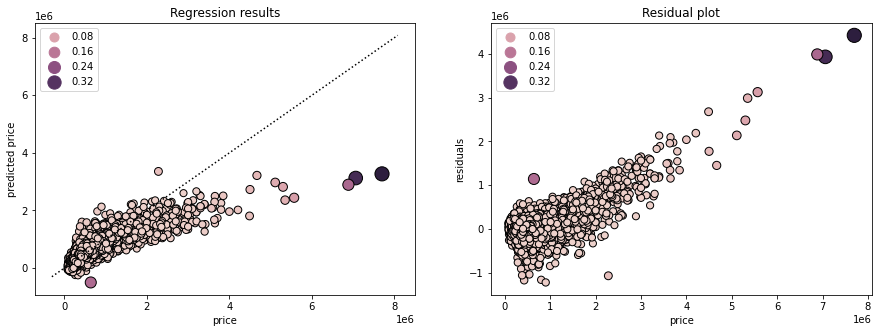

In [124]:
# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
influence = OLSInfluence(results)
cook_dist, p_value = influence.cooks_distance
leverage = influence.hat_matrix_diag
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ax = axs[0]
ax.set_title('Regression results')
sns.scatterplot(data=data, y=results.fittedvalues, x='price',
                hue=cook_dist, size=cook_dist, ax=ax,
                sizes=(50, 200), edgecolor='black', linewidth=1)
ax.set_ylabel('predicted price')
ax.plot(ax.get_xlim(), ax.get_xlim(), ':k')
ax = axs[1]
axs[1].set_title('Residual plot')
sns.scatterplot(data=data, y=results.resid, x='price',
                hue=cook_dist, size=cook_dist, ax=ax,
                sizes=(50, 200), edgecolor='black', linewidth=1)
ax.set_ylabel('residuals')
plt.show()

## Problem
Your model was not really well adapted to your data, as indicated by your R² coefficients. The closer the value is to one, the better fit your model was.

A linear model assumes that the errors $\epsilon$ will be normaly distributed with mean zero. If the mean of erros was zero, the relationship between predicted prices and real prices would be centered on the 45 degree dashed line.

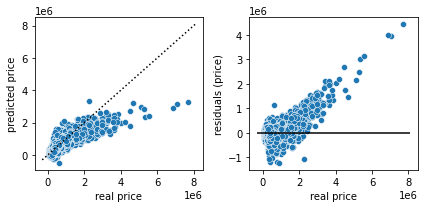

In [125]:
predictions = model.predict(X)  # compute model predictions
residuals = y - predictions 

fig, axs = plt.subplots(1,2, figsize=(6,3))
ax = axs[0]
sns.scatterplot(x=y, y=predictions, ax=ax)
ax.plot(ax.get_xlim(), ax.get_xlim(), ':k')
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')

ax = axs[1]
sns.scatterplot(x=y, y=residuals, ax=ax)
ax.hlines(0, *ax.get_xlim(), colors=['k'])
ax.set_xlabel('real price')
ax.set_ylabel('residuals (price)')
fig.tight_layout()


In [126]:
residuals.describe()

count    2.159700e+04
mean    -1.064546e-08
std      2.037734e+05
min     -1.221359e+06
25%     -1.012382e+05
50%     -1.122584e+04
75%      7.789000e+04
max      4.426360e+06
Name: price, dtype: float64


If we plot the histogram of errors, we see their distribution is not normal and heavy tailed to the left:

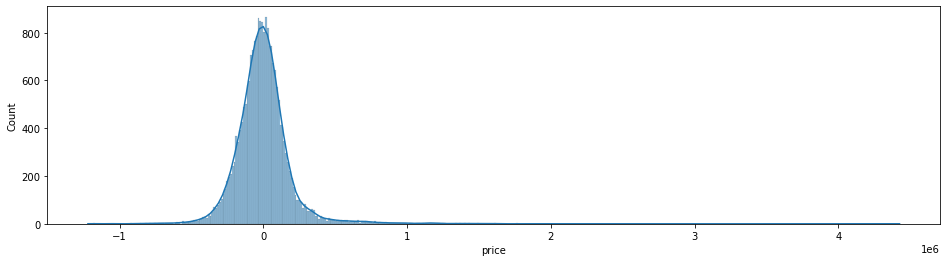

In [127]:
sns.histplot(x=residuals, kde=True)
plt.gcf().set_size_inches(16,4)

A linear model also assumes a linear relationship between the target features and the predictor features. This could be observed using scatter plots (if it were true):

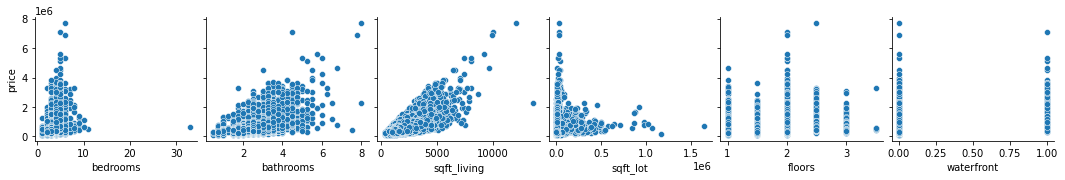

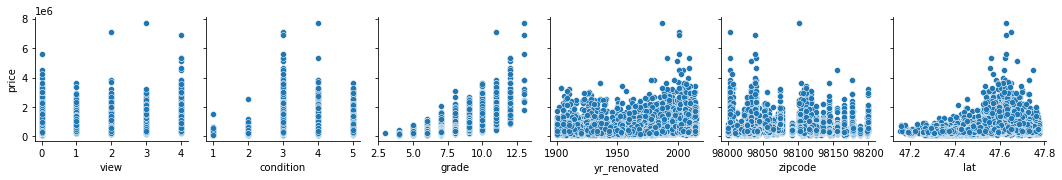

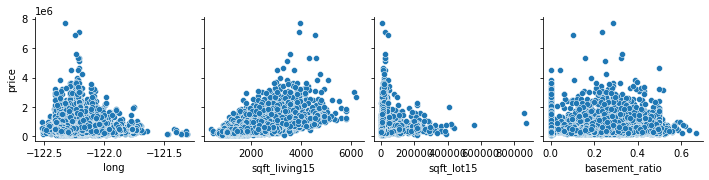

In [128]:
grid_w = 6
for i in range(1,data.shape[1],grid_w):
    sns.pairplot(
        data=data, 
        x_vars=(data.columns[i:i+grid_w]),
        y_vars=['price'], height=2.5
    )


If the relationship between predictors and target is linear, they should have similar distributions (up to a linear transformation). The presence of outliers, among other factors, may violate this assumption.

## Your turn

One common solution to this problem is to apply the different outlier handling techniques we just saw to the different features in order to recode/rescale/transform the features so that data better complies to the linear relationship assumption.

You may for instance try to get all features to be closer to a normal distribution.

Scikit-learn proposes some implementation of some transforms we saw in the course. An [article comparing the methods on features having outliers is available](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Among these you can find:
- The Box-Cox transoformation that can be done using the [PowerTransformer](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#powertransformer)
- Winsorizing that can be achieved using [QuantileTransformer](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#quantiletransformer-uniform-output)


1. Take a look at the stats, histograms and box-plots for the different variables in the dataframe
2. Which features look like good candidates for winsorizing?
3. Which features look like good candidates for Box-Cox transformations?
4. If you have time, test your plan by fitting a new regression model and comparing the results


In [129]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_ratio
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402029e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1973.382322,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.124594
std,2.876736e+09,3.671337e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,28.808668,53.513072,0.138552,0.140724,685.230472,27274.441950,0.170999
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1954.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1977.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.274390
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,0.666667


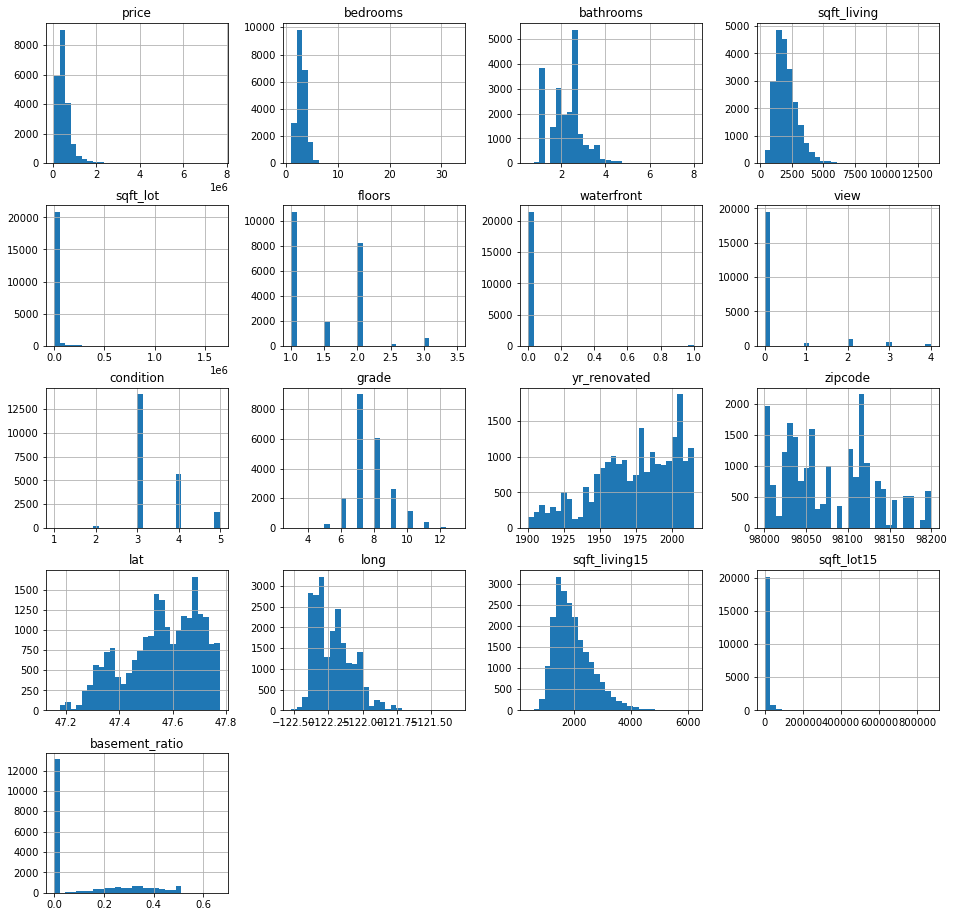

In [130]:
_ = house_data.drop(columns=['id', 'date']).hist(bins=30, figsize=(16,16))

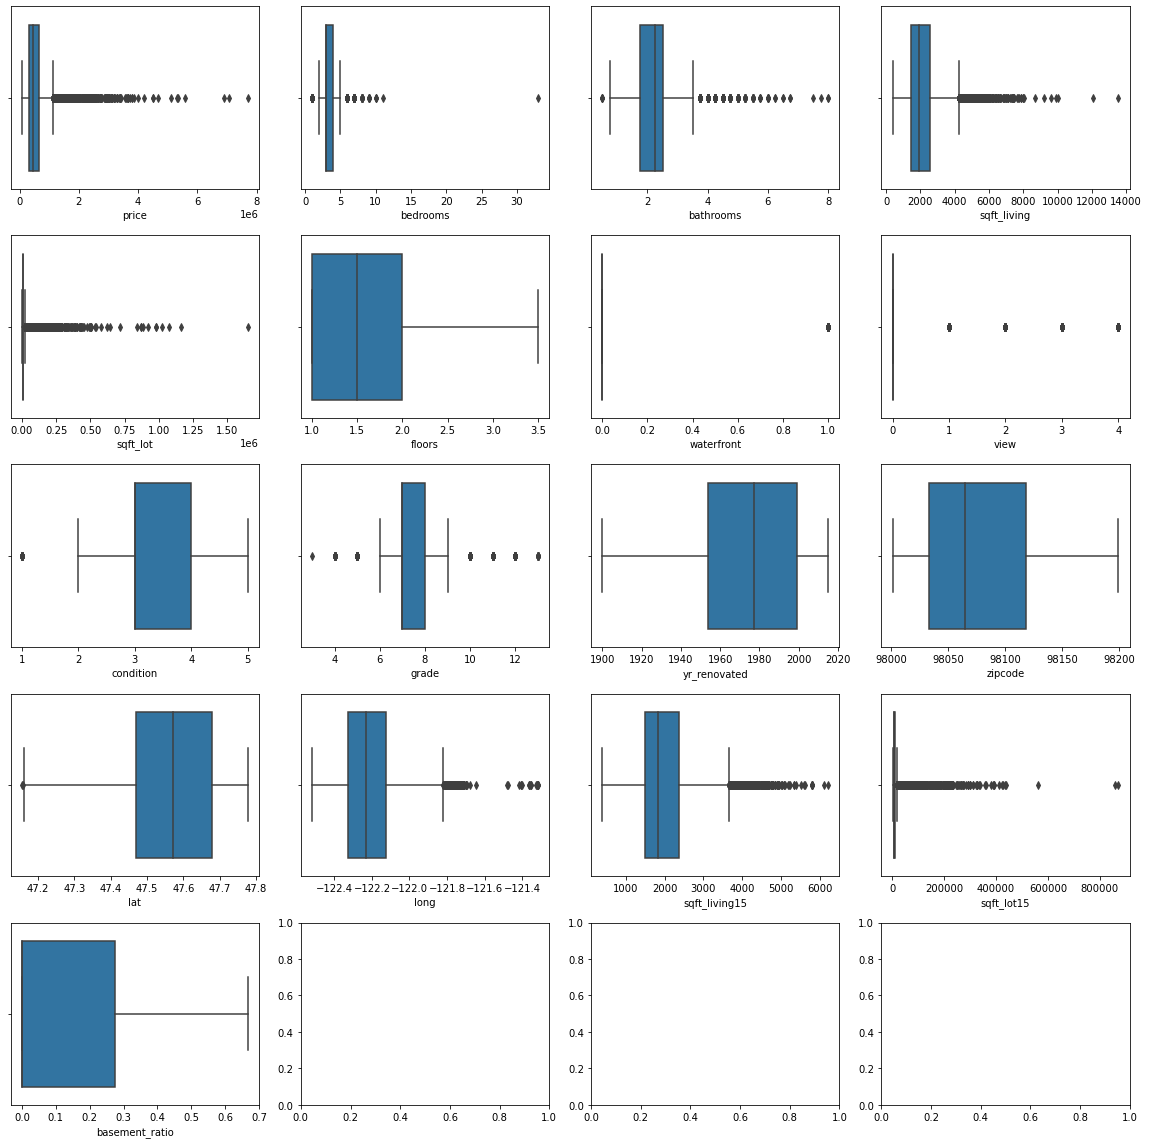

In [131]:
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
df = house_data.drop(columns=['id', 'date'])
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axs[i])
plt.tight_layout()

## Transforming target variable

### Robust scaler

In [132]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import RobustScaler


model2 = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=RobustScaler()
    )


model2.fit(X, y)
model2.score(X, y)

0.6919321379379058

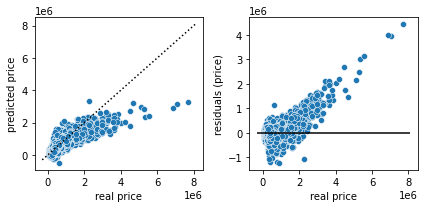

In [133]:
predictions = model2.predict(X)  # compute model predictions
residuals = y - predictions 

fig, axs = plt.subplots(1,2, figsize=(6,3))
ax = axs[0]
sns.scatterplot(x=y, y=predictions, ax=ax)
ax.plot(ax.get_xlim(), ax.get_xlim(), ':k')
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')

ax = axs[1]
sns.scatterplot(x=y, y=residuals, ax=ax)
ax.hlines(0, *ax.get_xlim(), colors=['k'])
ax.set_xlabel('real price')
ax.set_ylabel('residuals (price)')
fig.tight_layout()


### Quantile transformer

In [134]:
from sklearn.preprocessing import QuantileTransformer


model_pwr = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(output_distribution='normal')
    )


model_pwr.fit(X, y)
model_pwr.score(X, y)

0.4555951926140709

c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but QuantileTransformer was fitted without feature names
  warnings.warn(


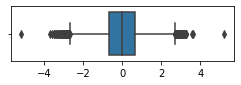

In [135]:
rescaled_prices = model_pwr.transformer_.transform(pd.DataFrame(y)).squeeze()
sns.boxplot(x=rescaled_prices, orient='horiz')
plt.gcf().set_size_inches(4,1)

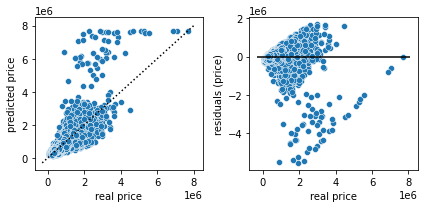

In [136]:
predictions = model_pwr.predict(X)  # compute model predictions
residuals = y - predictions 

fig, axs = plt.subplots(1,2, figsize=(6,3))
ax = axs[0]
sns.scatterplot(x=y, y=predictions, ax=ax)
ax.plot(ax.get_xlim(), ax.get_xlim(), ':k')
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')

ax = axs[1]
sns.scatterplot(x=y, y=residuals, ax=ax)
ax.hlines(0, *ax.get_xlim(), colors=['k'])
ax.set_xlabel('real price')
ax.set_ylabel('residuals (price)')
fig.tight_layout()


### Power transformer

In [137]:
from sklearn.preprocessing import PowerTransformer


model_pwr = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=PowerTransformer()
    )


model_pwr.fit(X, y)
model_pwr.score(X, y)

-6.205213072959682

c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PowerTransformer was fitted without feature names
  warnings.warn(


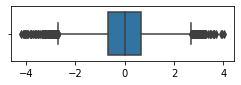

In [138]:
rescaled_prices = model_pwr.transformer_.transform(pd.DataFrame(y)).squeeze()
sns.boxplot(x=rescaled_prices, orient='horiz')
plt.gcf().set_size_inches(4,1)

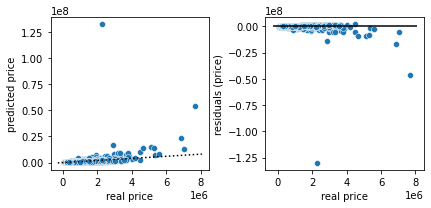

In [139]:
predictions = model_pwr.predict(X)  # compute model predictions
residuals = y - predictions 

fig, axs = plt.subplots(1,2, figsize=(6,3))
ax = axs[0]
sns.scatterplot(x=y, y=predictions, ax=ax)
ax.plot(ax.get_xlim(), ax.get_xlim(), ':k')
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')

ax = axs[1]
sns.scatterplot(x=y, y=residuals, ax=ax)
ax.hlines(0, *ax.get_xlim(), colors=['k'])
ax.set_xlabel('real price')
ax.set_ylabel('residuals (price)')
fig.tight_layout()


## Transforming predictor variables as well

In [140]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_ratio'],
      dtype='object')

In [141]:
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer


column_trans = make_column_transformer(
    (PowerTransformer(), 
     ['sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement','sqft_living15', 'sqft_lot15']),
    (QuantileTransformer(output_distribution='normal', random_state=42), 
     ['yr_built', 'yr_renovated', 'zipcode',
      'lat', 'long',]),
    remainder=RobustScaler()
    # remainder='passthrough'
)

X_transf = column_trans.fit_transform(X)



ValueError: A given column is not a column of the dataframe

NameError: name 'X_transf' is not defined

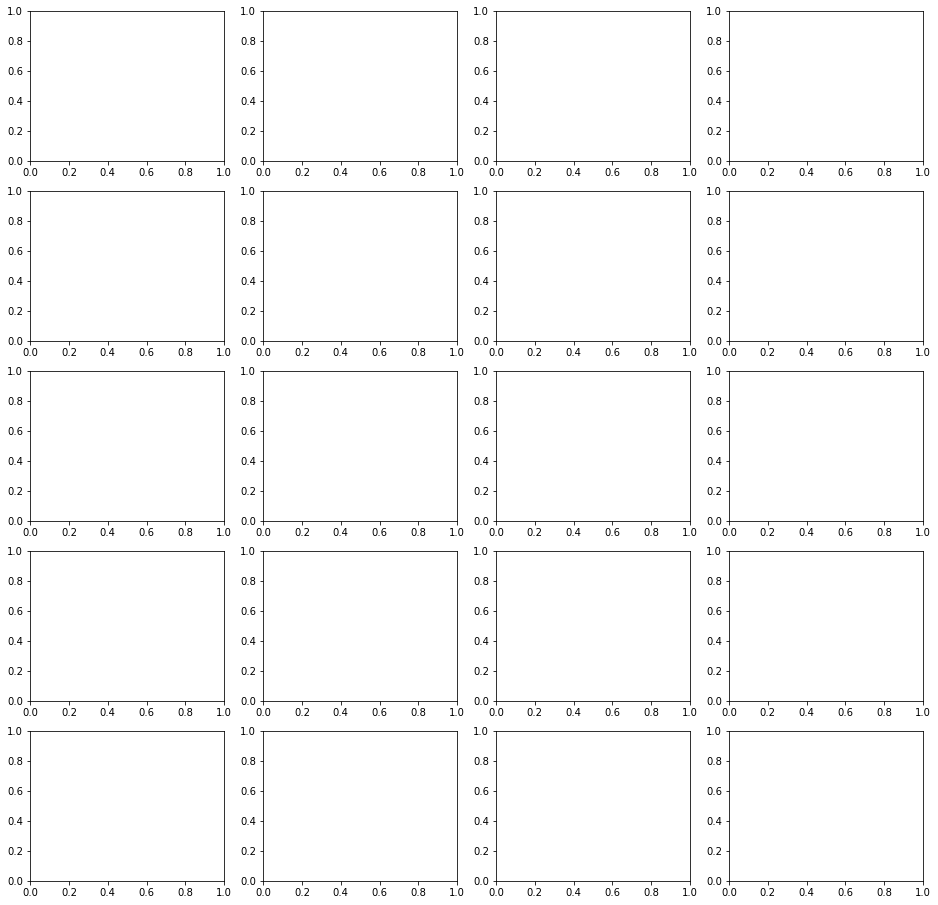

In [ ]:
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
df = pd.DataFrame(data=X_transf, columns=column_trans.get_feature_names_out())
for i, col in enumerate(df):
    sns.violinplot(data=df, x=col, ax=axs[i])
    sns.boxplot(data=df, x=col, ax=axs[i], width=0)
plt.tight_layout()

In [ ]:

model4 = TransformedTargetRegressor(
    regressor=LinearRegression(),
    # transformer=RobustScaler()
    transformer=PowerTransformer(method="box-cox", standardize=True)
    )


model4.fit(X_transf, y)
model4.score(X_transf, y)

0.6731746758740873

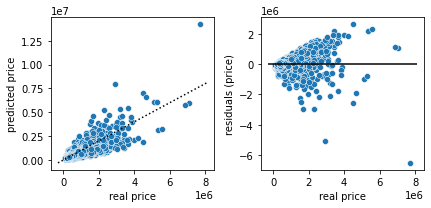

In [ ]:
predictions = model4.predict(X_transf)  # compute model predictions
residuals = y - predictions 

fig, axs = plt.subplots(1,2, figsize=(6,3))
ax = axs[0]
sns.scatterplot(x=y, y=predictions, ax=ax)
ax.plot(ax.get_xlim(), ax.get_xlim(), ':k')
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')

ax = axs[1]
sns.scatterplot(x=y, y=residuals, ax=ax)
ax.hlines(0, *ax.get_xlim(), colors=['k'])
ax.set_xlabel('real price')
ax.set_ylabel('residuals (price)')
fig.tight_layout()


## Model coefs

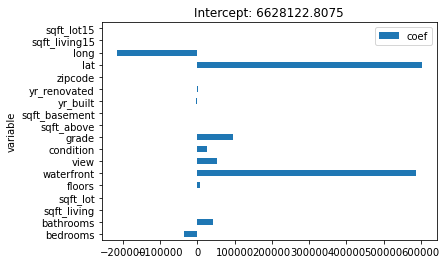

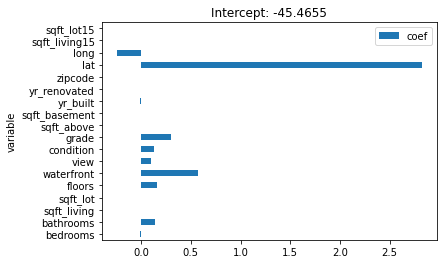

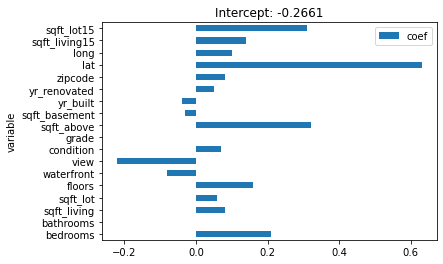

In [ ]:
for estim in [model, model_pwr.regressor_, model4.regressor_]:
    df = pd.DataFrame(
        data=dict(coef=estim.coef_.round(2),
                  variable=X.columns)
    )
    df.plot(kind='barh', y='coef', x='variable')
    plt.title(f'Intercept: {estim.intercept_:0.4f}')
